# Identitas
Nama: Hidayat Widi Saputra

Nim: 2341720157

Kelas: TI-3G

Absen: 13


# Dataset - House Prices Dataset
[House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Dataset ini berisi atribut rumah (luas, tipe bangunan, kondisi, lokasi, dsb.)
yang dapat digunakan untuk eksplorasi fitur, penanganan missing values, dan clustering
rumah dengan karakteristik mirip.

Langkah tambahan:
- Fokus pada subset fitur numerik terlebih dahulu.
- Coba buat fitur baru seperti “TotalArea = GrLivArea + TotalBsmtSF”.




## Persiapan (Library)

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
try:
  from annoy import AnnoyIndex
except:
  !pip install -q annoy
  from annoy import AnnoyIndex

In [2]:
try:
    from google.colab import drive
    from google.colab.output import clear as clear_output
    drive.mount('/content/drive')
    PATH_PREFIX = '/content/drive/MyDrive/Kuliah/K3S1[SEM5]/PEMB_MESIN/UTS/dataset/'
    clear_output()
except: 
    PATH_PREFIX = './dataset/'

df = pd.read_csv(PATH_PREFIX +'train.csv')

df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing

In [3]:
df[df['Alley'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


#### Tangani missing values

In [4]:
numeric_cols_with_nulls = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()]
print(df[numeric_cols_with_nulls].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB
None


In [5]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# "No prescence" Berdasarkan deskripsi data
df["PoolQC"].fillna("NoPool", inplace=True)
df["MiscFeature"].fillna("NOMiscFeature", inplace=True)
df["Alley"].fillna("NOAlley", inplace=True)
df["Fence"].fillna("NOFence", inplace=True)
df["FireplaceQu"].fillna("NOFireplaceQu", inplace=True)
df["GarageCond"].fillna("NOGarageCond", inplace=True)
df["GarageQual"].fillna("NOGarageQual", inplace=True)
df["GarageYrBlt"].fillna("NOGarageYrBlt", inplace=True)
df["GarageFinish"].fillna("NOGarageFinish", inplace=True)
df["GarageType"].fillna("NOGarageType", inplace=True)
df["BsmtCond"].fillna("NOBsmtCond", inplace=True)
df["BsmtExposure"].fillna("NOBsmtExposure", inplace=True)
df["BsmtQual"].fillna("NOBsmtQual", inplace=True)
df["BsmtFinType2"].fillna("NOBsmtFinType2", inplace=True)
df["BsmtFinType1"].fillna("NOBsmtFinType1", inplace=True)

# Numerical variables (by neighborhood) in Kategoris
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"] = df.groupby("Neighborhood")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"] = df.groupby("Neighborhood")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["MasVnrType"] = df.groupby("Neighborhood")["MasVnrType"].transform(lambda x: x.fillna(0))
df["MasVnrArea"] = df.groupby("Neighborhood")["MasVnrArea"].transform(lambda x: x.fillna(x.mean()))
df["MSZoning"] = df.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode().values[0]))
df["Exterior2nd"] = df.groupby("Neighborhood")["Exterior2nd"].transform(lambda x: x.fillna(x.mode().values[0]))
df["BsmtUnfSF"] = df.groupby("Neighborhood")["BsmtUnfSF"].transform(lambda x: x.fillna(x.median()))
df["TotalBsmtSF"] = df.groupby("Neighborhood")["TotalBsmtSF"].transform(lambda x: x.fillna(x.median()))
df["Exterior1st"] = df.groupby("Neighborhood")["Exterior1st"].transform(lambda x: x.fillna(x.mode().values[0]))
df["SaleType"] = df.groupby("Neighborhood")["SaleType"].transform(lambda x: x.fillna(x.mode().values[0]))
df["Electrical"] = df.groupby("Neighborhood")["Electrical"].transform(lambda x: x.fillna(x.mode().values[0]))
df["KitchenQual"] = df.groupby("Neighborhood")["KitchenQual"].transform(lambda x: x.fillna(x.mode().values[0]))
df["GarageArea"] = df.groupby("Neighborhood")["GarageArea"].transform(lambda x: x.fillna(x.median()))
df["GarageCars"] = df.groupby("Neighborhood")["GarageCars"].transform(lambda x: x.fillna(x.mode().values[0]))

# Berdasarkan deskripsi data
df["Functional"] = df["Functional"].fillna("Typ")
df["BsmtHalfBath"].fillna(0, inplace=True)
df["BsmtFullBath"].fillna(0, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('None')

for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(0)


df = df.drop(['Id', 'SalePrice'], axis=1)
try:
  clear_output()
except:
  pass

In [7]:
# df = df.drop([
#     'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
#     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
#     axis=1,
# )

# df = df.drop([
#     'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
#     'Street', 'RoofMatl', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir',
#     'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive',
#     'MSZoning', 'SaleType', 'SaleCondition', 'LandContour', 'BsmtFinType2'
# ],axis=1)

In [8]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


###	Buat minimal satu fitur baru hasil kombinasi fitur lama
#### Coba buat fitur baru seperti “TotalArea = GrLivArea + TotalBsmtSF”.

In [9]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
display(df[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head())

,GrLivArea,TotalBsmtSF,TotalArea
0,1710,856,2566
1,1262,1262,2524
2,1786,920,2706
3,1717,756,2473
4,2198,1145,3343


### Normalisasi atau standarisasi data

In [10]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('to_string', FunctionTransformer(lambda x: x.astype(str))), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols) 
    ],
    remainder='passthrough'
)

df_processed_array = preprocessor.fit_transform(df)

feature_names_num = numerical_cols
feature_names_cat = preprocessor.named_transformers_['cat'].named_steps['onehot'] \
                      .get_feature_names_out(categorical_cols).tolist()

all_feature_names = feature_names_num + feature_names_cat

df = pd.DataFrame(df_processed_array, columns=all_feature_names, index=df.index)

In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns
data_for_clustering = df[numerical_cols]

## Clustering

### K-Means

In [12]:
def plot_kmeans_elbow(data, k_range):
    """
    Calculates and plots the Within-Cluster Sum of Squares (WCSS) for a range of K values
    for KMeans clustering to help determine the optimal number of clusters.

    Args:
        data (pd.DataFrame): The DataFrame to cluster.
        k_range (list or range): A list or range of integers representing the number of clusters to test.
    """
    wcss = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o')
    plt.title('Elbow untuk Optimal K')
    plt.xlabel('Jumlah Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS) / Inertia')
    plt.grid(True)
    plt.show()

In [13]:
def perform_kmeans(data, n_clusters):
    """
    Performs KMeans clustering on the input data.

    Args:
        data (pd.DataFrame or np.ndarray): The data to cluster.
        n_clusters (int): The number of clusters to form.

    Returns:
        np.ndarray: The cluster labels assigned by KMeans.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(data)
    return kmeans.labels_

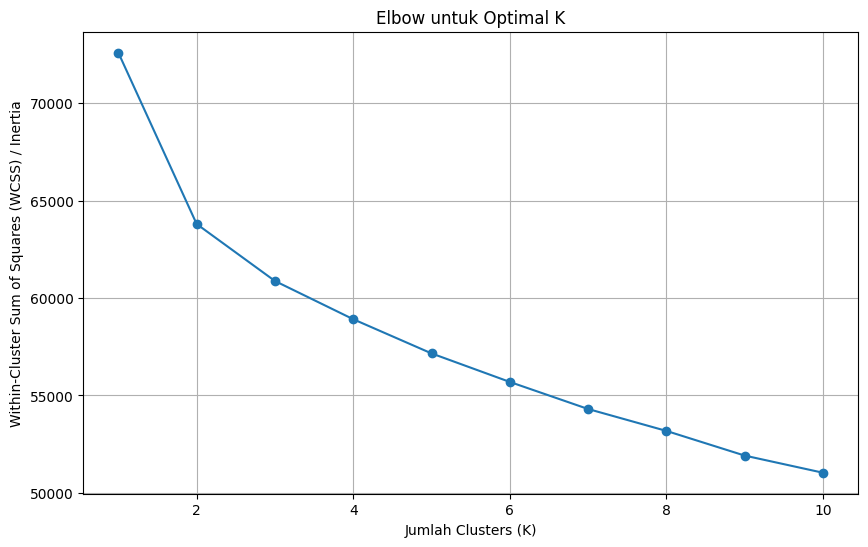

In [14]:
k_range = range(1, 11)

plot_kmeans_elbow(data_for_clustering, k_range)

In [15]:
k_value = 2

kmeans_labels = perform_kmeans(data_for_clustering, k_value)

df['kmeans_cluster_label'] = kmeans_labels

display(df.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,kmeans_cluster_label
0,0.073375,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510052,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-0.872563,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.575021,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.073375,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.321825,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,0.309859,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.575021,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.073375,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.362609,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


### DBScan

In [16]:
def find_best_dbscan_params(data, eps_range, min_samples_range):
    """
    Mencari parameter eps dan min_samples terbaik untuk DBSCAN berdasarkan Silhouette Score.

    Args:
        data (pd.DataFrame or np.ndarray): Data yang akan di-cluster.
        eps_range (list or np.ndarray): Range nilai eps yang akan dicoba.
        min_samples_range (list or range): Range nilai min_samples yang akan dicoba.

    Returns:
        tuple: (best_eps, best_min_samples, best_score, results_df)
            - best_eps: Nilai eps terbaik
            - best_min_samples: Nilai min_samples terbaik
            - best_score: Silhouette score terbaik
            - results_df: DataFrame berisi semua hasil percobaan
    """
    results = []
    best_score = -1
    best_eps = None
    best_min_samples = None

    print("Mencari parameter DBSCAN terbaik...")
    print(f"Testing {len(eps_range)} eps values × {len(min_samples_range)} min_samples values = {len(eps_range) * len(min_samples_range)} combinations\n")

    # Pastikan data berupa numpy array untuk masking yang konsisten
    data_arr = data.values if isinstance(data, pd.DataFrame) else np.asarray(data)

    for eps in eps_range:
        for min_samples in min_samples_range:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data_arr)

            # Hitung jumlah cluster (tidak termasuk noise)
            unique_labels = np.unique(labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
            n_noise = int(np.sum(labels == -1))

            # Siapkan masking untuk mengabaikan noise
            mask = labels != -1
            n_mask = int(np.sum(mask))

            # Hitung silhouette score hanya jika kondisi valid:
            # 1) minimal 2 cluster berbeda pada data non-noise
            # 2) jumlah cluster < jumlah sampel non-noise (syarat silhouette)
            score = -1
            if n_clusters > 1 and n_mask > 1:
                masked_labels = labels[mask]
                n_unique_masked = len(np.unique(masked_labels))
                if 1 < n_unique_masked < n_mask:
                    try:
                        score = silhouette_score(data_arr[mask], masked_labels)
                    except Exception as e:
                        # Bila perhitungan gagal (cluster degenerat), tandai sebagai tidak valid
                        score = -1

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': n_noise / len(labels),
                'silhouette_score': score
            })

            # Update best parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                print(f"✓ New best: eps={eps:.3f}, min_samples={min_samples}, "
                      f"clusters={n_clusters}, noise={n_noise}, score={score:.4f}")

    results_df = pd.DataFrame(results)

    print(f"\n{'='*60}")
    print(f"HASIL TERBAIK:")
    print(f"  eps: {best_eps}")
    print(f"  min_samples: {best_min_samples}")
    print(f"  Silhouette Score: {best_score:.4f}")
    print(f"{'='*60}\n")

    return best_eps, best_min_samples, best_score, results_df


In [17]:
def perform_dbscan(data, eps, min_samples):
    """
    Performs DBSCAN clustering on the input data.

    Args:
        data (pd.DataFrame or np.ndarray): The data to cluster.
        eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
        np.ndarray: The cluster labels assigned by DBSCAN, with -1 indicating noise.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    return dbscan.labels_

In [18]:
# Cari parameter terbaik untuk DBSCAN
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(1, 11)

best_eps, best_min_samples, best_score, results_df = find_best_dbscan_params(
    data_for_clustering,
    eps_range,
    min_samples_range
)


print("\nTop 10 kombinasi parameter terbaik:")
top_results = results_df.nlargest(10, 'silhouette_score')
display(top_results)

Mencari parameter DBSCAN terbaik...
Testing 14 eps values × 10 min_samples values = 140 combinations

✓ New best: eps=0.400, min_samples=1, clusters=1458, noise=0, score=0.0018
✓ New best: eps=0.400, min_samples=2, clusters=2, noise=1456, score=0.9517

HASIL TERBAIK:
  eps: 0.4
  min_samples: 2
  Silhouette Score: 0.9517


Top 10 kombinasi parameter terbaik:


,eps,min_samples,n_clusters,n_noise,noise_ratio,silhouette_score
31,0.4,2,2,1456,0.997260,0.951728
41,0.5,2,2,1456,0.997260,0.951728
51,0.6,2,2,1456,0.997260,0.951728
61,0.7,2,2,1456,0.997260,0.951728
71,0.8,2,2,1455,0.996575,0.930691
81,0.9,2,2,1455,0.996575,0.930691
121,1.3,2,4,1451,0.993836,0.833448
131,1.4,2,4,1451,0.993836,0.833448
91,1.0,2,3,1453,0.995205,0.833071
101,1.1,2,3,1453,0.995205,0.833071


In [19]:
eps_value = best_eps
min_samples_value = best_min_samples

print(f"Menggunakan parameter terbaik: eps={eps_value}, min_samples={min_samples_value}")

dbscan_labels = perform_dbscan(data_for_clustering, eps=eps_value, min_samples=min_samples_value)

df['dbscan_cluster_label'] = dbscan_labels

# Tampilkan informasi cluster
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nHasil Clustering DBSCAN:")
print(f"  Jumlah Cluster: {n_clusters}")
print(f"  Jumlah Noise Points: {n_noise}")
print(f"  Noise Ratio: {n_noise / len(dbscan_labels) * 100:.2f}%")

Menggunakan parameter terbaik: eps=0.4, min_samples=2

Hasil Clustering DBSCAN:
  Jumlah Cluster: 2
  Jumlah Noise Points: 1456
  Noise Ratio: 99.73%


### Visualisasi Clustering (2D)
Bandingkan hasil clustering

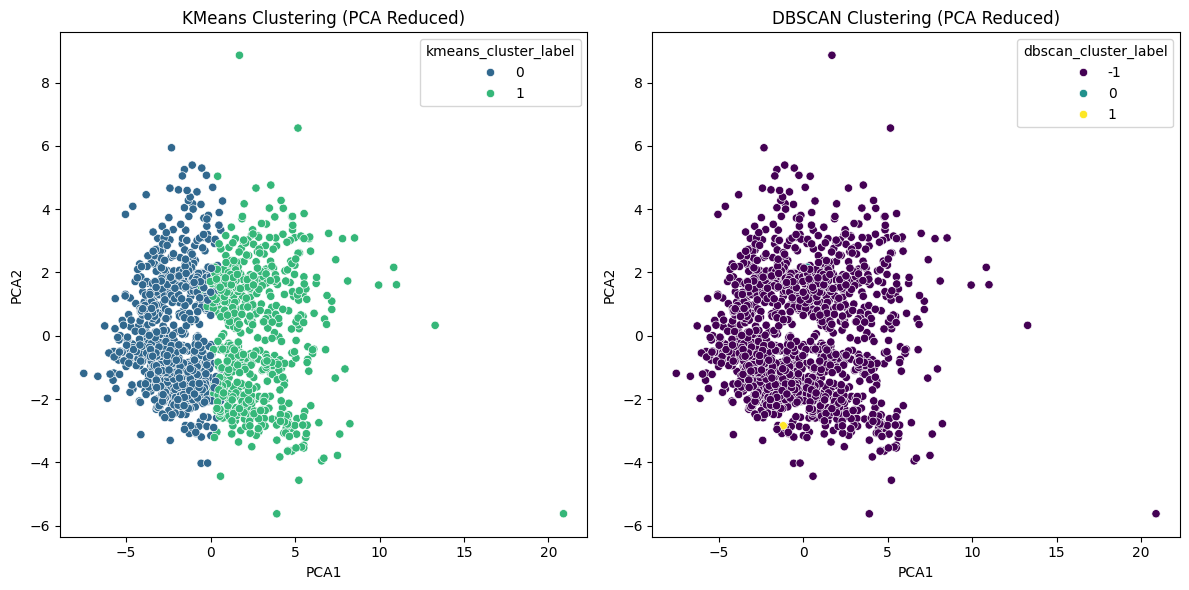

In [20]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=k_value)
data_pca = pca.fit_transform(data_for_clustering)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['kmeans_cluster_label'] = df['kmeans_cluster_label']
pca_df['dbscan_cluster_label'] = df['dbscan_cluster_label']

# Plot KMeans clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title('KMeans Clustering (PCA Reduced)')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='dbscan_cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering (PCA Reduced)')

plt.tight_layout()
plt.show()

In [21]:
# Silhouette Score
silhouette_kmeans = silhouette_score(data_for_clustering, df['kmeans_cluster_label'])
print(f'Silhouette Score (KMeans): {silhouette_kmeans}')

# Catatan: Skor Silhouette tidak cocok untuk DBSCAN dengan noise (label -1)
dbscan_core_samples_mask = (df['dbscan_cluster_label'] != -1)
if np.sum(dbscan_core_samples_mask) > 1:
    masked_labels = df['dbscan_cluster_label'][dbscan_core_samples_mask].to_numpy()
    n_unique = len(np.unique(masked_labels))
    n_mask = masked_labels.shape[0]
    if 1 < n_unique < n_mask:
        try:
            silhouette_dbscan = silhouette_score(data_for_clustering[dbscan_core_samples_mask], masked_labels)
            print(f'Silhouette Score (DBSCAN - tidak termasuk noise): {silhouette_dbscan}')
        except Exception as e:
            print('Silhouette Score (DBSCAN): gagal dihitung karena konfigurasi klaster tidak valid.')
    else:
        print('Silhouette Score (DBSCAN): Tidak cukup klaster valid setelah menghapus noise.')
else:
    print('Silhouette Score (DBSCAN): Tidak cukup titik non-noise untuk dihitung.')


# Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(data_for_clustering, df['kmeans_cluster_label'])
print(f'Davies-Bouldin Index (KMeans): {davies_bouldin_kmeans}')

# Indeks Davies-Bouldin juga sensitif terhadap noise.
if np.sum(dbscan_core_samples_mask) > 1:
    masked_labels = df['dbscan_cluster_label'][dbscan_core_samples_mask].to_numpy()
    n_unique = len(np.unique(masked_labels))
    n_mask = masked_labels.shape[0]
    if 1 < n_unique < n_mask:
        try:
            davies_bouldin_dbscan = davies_bouldin_score(data_for_clustering[dbscan_core_samples_mask], masked_labels)
            print(f'Davies-Bouldin Index (DBSCAN - tidak termasuk noise): {davies_bouldin_dbscan}')
        except Exception:
            print('Davies-Bouldin Index (DBSCAN): gagal dihitung karena konfigurasi klaster tidak valid.')
    else:
        print('Davies-Bouldin Index (DBSCAN): Tidak cukup klaster valid setelah menghapus noise.')
else:
    print('Davies-Bouldin Index (DBSCAN): Tidak cukup titik non-noise atau kluster untuk dihitung.')

Silhouette Score (KMeans): 0.12367667965530593
Silhouette Score (DBSCAN - tidak termasuk noise): 0.9517284735661289
Davies-Bouldin Index (KMeans): 2.549567839449926
Davies-Bouldin Index (DBSCAN - tidak termasuk noise): 0.04829953556033312


## Approximate Nearest Neighbor (ANN)

Approximate Nearest Neighbor (ANN) Results:
Query Point Index: 0
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (0, 0.0000, 1)
    - (1240, 1.9618, 1)
    - (1366, 2.6493, 1)
    - (1410, 3.0846, 1)
    - (1365, 3.4615, 1)
--------------------
Query Point Index: 1
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (1, 0.0000, 0)
    - (925, 5.6228, 0)
    - (1076, 6.1314, 0)
    - (611, 6.1882, 0)
    - (892, 6.1919, 0)
--------------------
Query Point Index: 2
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (2, 0.0000, 1)
    - (1410, 3.4039, 1)
    - (1366, 3.4509, 1)
    - (1240, 3.4822, 1)
    - (131, 3.6844, 1)
--------------------
Query Point Index: 3
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (3, 0.0000, 0)
    - (1263, 6.4997, 0)
    - (1185, 6.5953, 0)
    - (1197, 6.6303, 0)
    - (1382, 6.7542, 0)
--------------------
Query Point Index: 4
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (4, 0.0000, 1)
    - (

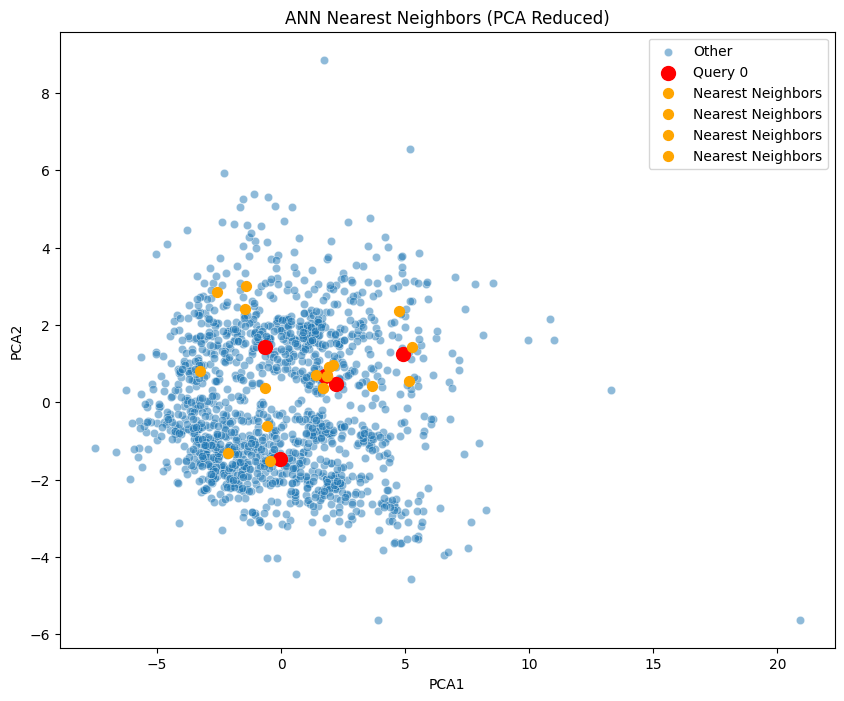

In [22]:
def find_nearest_neighbors_annoy(data, n_trees, query_indices, num_neighbors, kmeans_labels):
    """
    Builds an Annoy index and finds nearest neighbors for given query points.

    Args:
        data (pd.DataFrame or np.ndarray): The data to build the index from.
        n_trees (int): The number of trees for the Annoy index.
        query_indices (list): A list of indices of the data points to use as queries.
        num_neighbors (int): The number of nearest neighbors to find for each query point.
        kmeans_labels (np.ndarray): The KMeans cluster labels for the data.


    Returns:
        None: Prints the nearest neighbors and their distances.
    """
    # Define the number of dimensions for the Annoy index
    feature_matrix = data.to_numpy(dtype=np.float32)
    ann_dim = feature_matrix.shape[1]

    ann_index = AnnoyIndex(ann_dim, 'euclidean')
    for idx, vector in enumerate(feature_matrix):
      ann_index.add_item(idx, vector)
    ann_index.build(n_trees)

    print("Approximate Nearest Neighbor (ANN) Results:")
    print("="*50)

    # Prepare data for plotting
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(feature_matrix)
    pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
    pca_df['Type'] = 'Other'

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, alpha=0.5, label='Other')


    for example_item_index in query_indices:
        # Find nearest neighbors
        nearest_neighbors_indices, distances = ann_index.get_nns_by_item(
            example_item_index, num_neighbors, include_distances=True
        )

        print(f"Query Point Index: {example_item_index}")
        print("  Nearest Neighbors (Index, Distance, KMeans Cluster):")
        for neighbor_index, distance in zip(nearest_neighbors_indices, distances):
            print(f"    - ({neighbor_index}, {distance:.4f}, {kmeans_labels[neighbor_index]})")

        # Mark the query point and its neighbors in the plot
        plt.scatter(data_pca[example_item_index, 0], data_pca[example_item_index, 1], color='red', s=100, label=f'Query {example_item_index}' if example_item_index == query_indices[0] else "")
        for neighbor_index in nearest_neighbors_indices[1:]: # Exclude the query point itself
            plt.scatter(data_pca[neighbor_index, 0], data_pca[neighbor_index, 1], color='orange', s=50, label='Nearest Neighbors' if example_item_index == query_indices[0] else "")

        print("-" * 20)

    plt.title('ANN Nearest Neighbors (PCA Reduced)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()


ann_data = data_for_clustering.copy()

n_trees = 100

# Select a few query points (first 5 data points)
query_indices = [0, 1, 2, 3, 4]
num_neighbors = 5 # Number of nearest neighbors to find

find_nearest_neighbors_annoy(ann_data, n_trees, query_indices, num_neighbors, kmeans_labels)

## Tulis kesimpulan singkat
a.	Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda

- KMeans: KMeans membagi data menjadi 2 klaster, dengan ditentukan menggunakan elbow terbaik
- DBSCAN: DBSCAN membagi data menjadi 2 tetapi terdapat banyak noise (-1)
- Berdasarkan hasil metrik evaluasi (Silhouette Score dan Davies-Bouldin Index) dan visualisasi, DBSCAN terlihat memberikan hasil yang lebih baik dalam memisahkan klaster yang padat dari noise, meskipun sebagian besar data dianggap noise. Memiliki skor Silhouette yang tinggi dan DBI yang rendah menunjukkan pemisahan klaster yang lebih baik

b.	Nilai metrik terbaik (Silhouette, DBI).

**DBSCAN tidak termasuk noise**
-   **Silhouette Score:**
    -   KMeans: 0.1236
    -   DBSCAN: 0.9517 terbaik (mendekati 1)
-   **Davies-Bouldin Index:**
    -   KMeans: 2.5495
    -   DBSCAN: 0.0482 terbaik (mendekati 0)

    

c.	Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda.

- Query Point Index 0 (KMeans Cluster 1), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 1.
- Query Point Index 1 (KMeans Cluster 0), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 0.
- Query Point Index 2 (KMeans Cluster 1), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 1.
- Query Point Index 3 (KMeans Cluster 0), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 0.
- Query Point Index 4 (KMeans Cluster 1), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 1.